In [2]:
from typing import Tuple, List, Dict, Any
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Hands-on Introduction to Deep Learning (Lecture 1)
<font color="red"><b>Under construction!!</b></font>

The **prereqs** are kept (on purpose) to a minimum, i.e.:
- Basic knowledge of <font color="blue"><b>derivatives and the chain rule</b></font>.
- Ability to perform <font color="blue"><b>simple matrix operations</b></font> (dot product, multiplication, transpose).
- A decent knowledge of <a href="https://www.python.org">Python</a> and <a href="https://www.numpy.org">NumPy</a>.<br>
  CHPC provides courses on these topics. You can find them at:<br>
  + <a href="https://github.com/chpc-uofu/python-lectures">Introduction to Python</a>
  + <a href="https://github.com/chpc-uofu/intro-numpy">Introduction to NumPy & SciPy</a>

Note:<br>
- If you want to know/investigate the mathematical details of DL, feel free to ask me (wim.cardoen@utah.edu). <br>
  We can discuss these topics outside this lecture.

Sketch of the introduction (<font color="red"><b> To be elaborated further</b></font>)

* What is AI? What are some of the approaches: logic, rule-based methods,...
* What is ML?
* Difference between supervised learning, semi-supervised and unsupervised learning.
  Give an examples of each of them.
* Deeplearning: in essence an old idea but why did it take off the last few years?
  - Amount of available data
  - Advent of GPUs which are perfect for this approach

# 2. The concept of a neuron/perceptron

A neuron:
- fundamental unit of the nervous system
- <font color="red"><b>find a schematic picture in physiology book</b></font> (dendrites, axon and cell nucleus).
- give rise to the concept of perceptron (Rosenblatt, 1957)
  
In essence, a <font color="green"><b>perceptron</b></font> is a **non-linear function** $f$ 
(<font color="green"><b>activation function</b></font>)<br>
which operates on an input and returns an output.

Or mathematically, $\textbf{y}=f(\textbf{x})$, where:
* $f$: non-linear/activation function
* $\textbf{x} \in \mathbb{R}^{n_1 \times 1}$: input vector i.e. $\textbf{x}:=(x_1,x_2,\ldots, x_{n_1})^T$.
* $\textbf{y} \in \mathbb{R}^{n_2 \times 1}$: output vector i.e. $\textbf{y}:=(y_1,y_2,\ldots, y_{n_2})^T$.

In what follows we will perform 
<font color="green"><b>logistic regression</b></font> (<font color="orangered">ones of the most simple neural net possible</font>) on a simple data set. <br>This simple toy model/example will allow us:
* to show the <b>essential features</b> of deep learning.
* to easily transition to the <b>general case</b>.

# 3.Logistic Regression (as the most simple neural net!)

## 3.1. Goal/Task

* To train a <font color="green"><b>binary classifier</b></font> based on a given training set
  <br>and **one perceptron** (<font color="green"><b>one unit</b></font>) in just <font color="green"><b>one layer</b></font>.
* To obtain the <font color="green"><b>accuracy</b></font> of the trained model using a test set.
* To <font color="green"><b>predict</b></font> the outcome of some data (provided) using the model.
* To get familiar with some DL net frameworks.

<img src="perceptron.jpeg" width="300">

## 3.2.Training of the binary classifier

The <font color="green"><b>training</b></font> of a binary classifier (and <font color="orangered">in extenso a deep neural net</font>) 
consists of the following steps:
* **Initialize** the <font color="green"><b>parameters</b></font> (<font color="green"><b>weight vector and bias</b></font>)
* Perform an **iterative loop** over the following 2 substeps:

  + <font color="green"><b>Forward propagation</b></font>:<br>
    Given a training set, and a set of <font color="green"><b>parameters</b></font> (weight vector and bias)
    we calculate the associated cost function,<br>
    which is a measure how different the predicted data are from the true data.

  + <font color="green"><b>Back propagation</b></font>:<br>
    Based on the cost function we perform an <font color="green"><b>update</b></font> on the set of<br> parameters (weight vector and bias)
    in order to <font color="green"><b>lower</b></font> the cost.
 

The <font color="green"><b>training set</b></font> consists of $m_{\mathrm{train}}$ data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{train}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.<br>
    Each dimension of the vector $\mathbf{x_i}$ represents a <font color="green"><b>feature</b></font> ($\Rightarrow$ n features).
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
    

### 3.2.1. Forward Propagation

* At the perceptron (only $\mathbf{1}$!), each data point $i$ ($i \in \{1,\ldots,m_{\mathrm{train}}\}$) will be<br>
  subjected to the following $2$ transformations:
  1. $\texttt{affine}$ transformation:<br>
       $\begin{eqnarray}
         z_i & = &   \mathbf{w^T}.\mathbf{x_i} +b \;\;,\;\; \mathbf{x_i} \in \mathbb{R}^{n\times 1} \nonumber \\
            &=  &  \displaystyle{\sum_{j=1}^n w_j x_{ji} +b} \nonumber
       \end{eqnarray}$
    
     where:<br>
     - $ \mathbf{w}$ : <font color="green"><b>weight</b></font> vector ($\in \mathbb{R}^{n \times 1}$)<br>
       Note: the weight vector has <font color="orangered">same number of dimensions as there are features</font> .
    
     - $ b$ : <font color="green"><b>bias</b></font> (scalar $\Rightarrow \in \mathbb{R}$).

     - For each data point: the <font color="orangered"> weight vector and bias used at this one perceptron are the same</font>.   
  2. subsequent $\texttt{non linear activation}$:<br>
     $a_i =  \sigma(z_i)$ , $a_i \in \mathbb{R}$<br>
     where:<br>
     - $\sigma$ is known as the <font color="green"><b>sigmoid</b></font> function.
   
     - $\begin{equation}
        \sigma(z) = \displaystyle \frac{1}{1+e^{-z}} 
       \end{equation}$
    
     - The activation of the <b>last layer</b> (in this case we only have one layer) is the same<br>
       as the predicted value ($\widehat{y_i})$. Thus, <br>
    
       $\begin{equation}
       \widehat{y_i} := a_i \nonumber
       \end{equation}$
   
* Calculate the <font color="green"><b>cost function</b></font> ($\mathcal{C}$).<br>
  The cost function $\mathcal{C}$ is defined as the mean of the <font color="green"><b>loss functions</b></font> ($\mathcal{L}^{(i)}$) over the $m_{\mathrm{train}}$ data points:

  $\begin{eqnarray}
       \mathcal{C}       & := & \displaystyle \frac{1}{m_{\mathrm{train}}} \sum_{i=1}^{m_{\mathrm{train}}}        \mathcal{L}^{(i)} 
  \end{eqnarray}$
  

  In case of **binary classification**, the **loss function** $\mathcal{L}^{(i)}$ for data point $i$ is given by:
  
  $\begin{eqnarray}
       \mathcal{L}^{(i)} & = & - \bigg [ y_i \log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i}) \bigg ] \\
                         & = & - \bigg [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \bigg ] \\
  \end{eqnarray}$

* <font color="red"><b>Computational Note:</b></font><br>
  The vectorization feature in NumPy should be exploited.<br>
  Instead of performing the $\texttt{affine transformation}$ and $\texttt{activation}$ on **one** element<br>
  at the time, perform the operation on an $\texttt{ndarray}$ of elements.

  Provided that:
  + $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.
  + $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
  + The $\mathrm{m}$ $\mathbf{x_i}$ column vectors can be collected in the $n \times m$ matrix $X$,<br>
    given by:

    $\begin{eqnarray}
         X & := & \begin{pmatrix}
                                \vdots & \cdots  &\vdots \\
                                 \mathbf{x_1}   & \vdots  & \mathbf{x_{m}}  \\
                                 \vdots & \cdots & \vdots 
                 \end{pmatrix}
     \end{eqnarray}$

      
  + The $\mathrm{m}$ $y_i$ values can be collected in the row vector $Y$,<br>
    given by:

    $\begin{eqnarray}
       Y & := & \begin{pmatrix} y_1 & y_2 & \cdots & y_{\mathrm{m}-1} & y_{\mathrm{m}} 
                 \end{pmatrix}
      \end{eqnarray}$

  + Thus:
    - $\begin{eqnarray}
         \mathbf{Z} & = &   \mathbf{w^T}.\mathbf{X} + \mathbf{b}  \nonumber 
       \end{eqnarray}$

    - $\begin{eqnarray}
          \mathbf{A} & = & \sigma(\mathbf{Z}) \nonumber
      \end{eqnarray}$
 

#### Some notes on the sigmoid function

The sigmoid function $\sigma(z)$ has the following properties:

* $
   \begin{equation}
  \lim_{ z \to -\infty} \sigma(z) = 0
  \end{equation}$

* $\begin{equation}
   \lim_{ z \to +\infty} \sigma(z) = 1
  \end{equation}$

* $\begin{equation}
   \sigma(0) = \frac{1}{2}
  \end{equation}$

* $\begin{equation}
  \displaystyle \frac{d \sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
  \end{equation}$

The range of the sigmoid is $[0,1]$ and thus be interpreted as a <font color="green"><b>probability</b></font>.
  

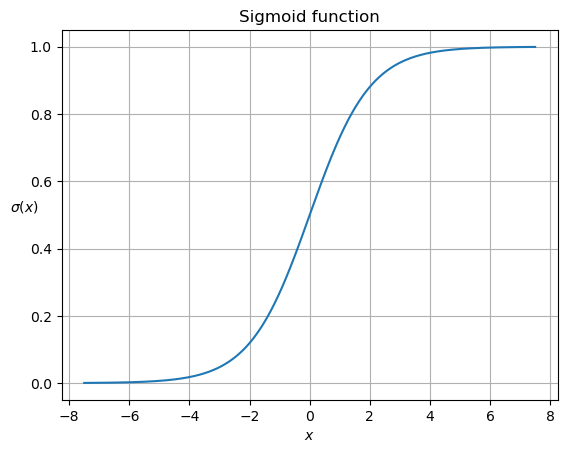

In [23]:
x = np.linspace(-7.5, 7.5, 1501)
y = 1.0/(1.0+np.exp(-x))
plt.title(r"Sigmoid function")
plt.xlabel(r"$x$")
plt.ylabel(r"$\sigma(x)$",rotation=0)
plt.plot(x,y)
plt.grid()
plt.show()

#### Exercise 1: Tools for the forward propagation

<font color="blue"><b>Implement the following **3** functions:</b></color>


##### Exercise 1.1:
`def init_param(n: int) -> Tuple[np.ndarray, float]:`<br>
  * The weight vector is a column vector having the <font color="red"><b>(n,1)</b></font> shape and of type float.
  * The bias is a scalar of type float.
  * All elements of the weight vector and bias can be initialized to $0.0$.

In [3]:
# Exercise 1.1:
def init_param(n: int) -> Tuple[np.ndarray, float]:
    """
    Initialize the parameters (weight, bias) for the Binary Classifier.
    
    Args:
        n (int): The number of features.
    
    Returns:
        Tuple[np.ndarray, float]: A tuple containing the initialized weight (column vector)
                                 & the initialized bias (scalar).
    """
    # Here comes YOUR code to initialize the weight vector & bias.
    # W =  <--- Weight (vector) to zero
    # b =  <--- bias (float) to zero
    return W,b

In [4]:
# Here comes the test code to check init_param

##### Exercise 1.2
`def sigmoid(Z: np.ndarray) -> np.ndarray:`<br>
  * Perform $\sigma(\mathbf{Z})$

In [17]:
# Exercise 1.2:
def sigmoid(Z: np.ndarray) -> np.ndarray:
    """
    Compute the sigmoid function.
    
    Args:
        Z (np.ndarray): The input value(s).
    
    Returns:
        np.ndarray: The sigmoid of the input value(s).
    """
    # Here comes YOUR code for the sigmoid function.
    # return <---  

In [26]:
# Here comes test code for the sigmoid function

##### Exercise 1.3
`def forward(X: np.ndarray,Y:np.ndarray,`<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`W: np.ndarray, b: float) ->`<br> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Tuple[np.ndarray, float]:`<br>
 *  $ \mathbf{Z} = \mathbf{w^T}.\mathbf{X} + \mathbf{b} $
 *  $ \mathbf{A} = \sigma(\mathbf{Z})$  ($\texttt{Ex 1.2.}$)
 *  $ \mathcal{C} = - \frac{1}{m} \displaystyle \sum_{i=1}^m \bigg [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \bigg ]$ <br>
    The latter equation can be easily vectorized in NumPy using $\mathbf{A}$ and $\mathbf{Y}$.

In [7]:
# Exercise 1.3:
def forward(X: np.ndarray, Y: np.ndarray,
            W: np.ndarray, b: float) -> Tuple[np.ndarray, float]:
    """
    Perform the forward pass of the binary classifier.
    
    Args:
        X (np.ndarray): The training data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        Y (np.ndarray): The training labels (targets) -> shape(1, m)
                        where m is #samples.
        W (np.ndarray): The weight vector             -> shape(n,1 ).
        b (float)     : The bias term                 -> float
    
    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the activation matrix and the cost.
    """
    # Here comes YOUR code for the forward propagation.
    num_samples = X.shape[1]
    # Z =   <-- Your code
    # A =   <-- Your code
    # cost =  <-- Your code
    return A, cost

In [27]:
# Here comes test code for Exercise 1.3

### 3.2.2. Back Propagation

Our ultimate goal (during the training phase of our model) is to find the <font color="green"><b>optimal values</b></font><br> for the weight vector ($\widehat{w}$), and the bias ($\widehat{b}$).<br>
  Thus:<br>

  $\begin{equation}
     \widehat{w}, \widehat{b} = \underset{w,b}{\operatorname{argmin}} \mathcal{C}
  \end{equation}$

This goal can be reached iteratively:
1. by calculating the <font color="green"><b>direction/gradient</b></font> w.r.t weights and bias which leads to a minimum of the cost function $\mathcal{C}$).
2. by subsequently <font color="green"><b>updating</b></font> the values of the weight vector and the bias along the aforementioned direction.

1.Calculate the **gradient of cost function** w.r.t the weights and the bias:
  
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} & = & \frac{\partial}{\partial a_i} \bigg [ - \big [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \big ] \bigg ]\\
                                                      & = & -\frac{y_i}{a_i} + \frac{(1-y_i)}{(1-a_i)}
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
        \frac{\partial \mathcal{L}^{(i)}}{\partial z_i} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i} \\
         & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial \sigma(z_i)}{\partial z_i} \\
         & =& a_i - y_i
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
       \frac{\partial \mathcal{L}^{(i)}}{\partial b} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial b} \\
                 & = & a_i - y_i
    \end{eqnarray}$
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial w_j} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial w_j} \\
                 & = & (a_i - y_i) x_{ji}
    \end{eqnarray}$
    
  Thus, <br>

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial b}  & =   &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b}  
                                             & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) 
     \end{eqnarray}$

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial w_j}  &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b} 
      & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) x_{ji} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
     \end{eqnarray}$

2.**Update** the parameters (using <a href="https://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a>): 

  $\begin{eqnarray}
      b & = & b - \alpha  \frac{\partial\mathcal{C}}{\partial b} \\
      w_j & = & w_j - \alpha  \frac{\partial\mathcal{C}}{\partial w_j} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
    \end{eqnarray}$

  where $\alpha$ is known as the <font color="green"><b>learning rate </b></font> or the <font color="green"><b>step size</b></font> (gradient descent).  

<font color="red"><b>Computational Note:</b></font><br>
  The vectorization feature in NumPy should be exploited.  

#### Exercise 2: Tools for the Back propagation

<font color="blue"><b>Implement the following functions:</b></font>

##### Exercise 2.1
`def calcgrad(X_train:np.ndarray, Y_train:np.ndarray, A:np.ndarray) ->\`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Tuple[np.ndarray, float]:`

These are the steps:  
* $\mathbf{dZ} = \mathbf{A} - \mathbf{Y}$
* $\mathbf{dW} = \frac{1}{m} \mathbf{X}.\mathbf{dZ}^T$
* $db = \frac{1}{m} \displaystyle \sum_{i=1}^m \mathbf{dZ}_i$
* return $\mathbf{dW},db$

In [10]:
# Exercise 2.1.:
def calcgrad(X: np.ndarray, Y: np.ndarray, 
             A:np.ndarray) ->  Tuple[np.ndarray, float]:
    """        
    Computes the gradients of the cost function with respect to W and b.
    Arg:
        X (np.ndarray): Training data -> shape(n,m)
        Y (np.ndarray): Training labels -> shape(1,m)
        A (np.ndarray): Activation matrix -> shape(1,m) 
    Return:
        A tuple containing the gradients with respect to W and b.
    """ 
    # Here comes the calcgrad code
    num_samples = X.shape[1]
    # dZ = <---
    # dW = <---
    # db = <---
    return dW,db

In [28]:
# Here comes test code for Ex. 2.1

`def update(Weights: np.ndarray, bias: float,\`<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`dWeight: np.ndarray, dbias:float, lr:float) -> Tuple[np.ndarray, float]:`<br>
Here are the steps:
* $\mathbf{W} = \mathbf{W} - \alpha \,\mathbf{dW}$
* $b = b - \alpha \,db$
* return $\mathbf{W},b$

In [20]:
# Exercise 2.2.:
def update(Weights: np.ndarray, bias: float,
           dWeight: np.ndarray, dbias:float,
           lr:float) -> Tuple[np.ndarray, float]:
    """
    Update the parameters using the gradients and learning rate.    

    Args:
        Weights (np.ndarray): The weight vector             -> shape(n, 1).
        bias (float)        : The bias term                 -> float
        dWeight (np.ndarray): The gradient of the cost w.r.t. W -> shape(n, 1).
        dbias (float)       : The gradient of the cost w.r.t. b -> float
        lr (float)          : The learning rate.    

    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the updated weight and bias.
    """
    # Here comes the code to update the weight vector and the bias.
    # W = <---
    # b = <---
    return W,b

In [29]:
# Here comes test code for Ex. 2.2

#### Exercise 3: Training (complete)

<font color="blue"><b>Implement the following function:</b></font>

`def train_model(X: nd.array, Y: nd.array, \`<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`num_epochs: int, lr: float) -> Tuple[List[float],np.ndarray, float]:`
Here are steps:
* initialize $\mathbf{W},b$ to 0.0  
* perform a loop/iteration:
  - Calculate $\mathbf{A}, \mathcal{C}$ (cost) using the forward function
  - Calculate the gradients $\mathbf{dW}, db$
  - Update $\mathbf{W}, b$ using the gradients $\mathbf{dW}, db$
* return lst(cost), $\mathbf{W},b$. 

In [22]:
# Exercise 3.1.
def train_model(X: np.ndarray, Y: np.ndarray,
                num_epochs: int, lr: float) -> Tuple[List[float],np.ndarray, float]:
    """
    Train the binary classifier using gradient descent.
    
    Args:
        X (np.ndarray): The training data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        Y (np.ndarray): The training labels (targets) -> shape(1, m)
                        where m is #samples.
        num_epochs (int): The number of epochs to train.
        lr (float)    : The learning rate.    
    
    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the final weight and bias after training.
    """
    # Here comes YOUR code to train the model.
    lstCost = []
    # W,b =         <--- Initialize to 0.0 using previous function
    for i in range(num_epochs):
        # A, cost = <--- Use the forward function
        lstCost.append(cost)
        # dW, db =  <--- Calc. the gradient
        # W, b = <-- Perform the update
    return lstCost, W, b    

In [30]:
# Here comes test code for exercise 3.1

## 4. Testing of the binary classifier 

Once our neural net has been trained, i.e. the <font color="green"><b>optimal values</b></font><br> 
for the parameters $\mathbf{w}$ and $b$ (i.e. $\mathbf{\widehat{w}}$ and $\widehat{b}$) are known. <br> 
We can now test our neural net model using the <font color="green"><b>test data set</b></font>.

* Apply the <font color="green"><b> predict </b></font> function the **test data set**.<br>
  The **predict** function has $2$ components:
  + Apply the **forward** propagation to the test data set but use $\mathbf{\widehat{w}}$ and $\widehat{b}$.
  + Map the obtained activation to either $0$ or $1$
* Calculate the number of correct predictions vs. total predictions. 

### 4.1.Prediction function

* The <font color="green"><b>test set</b></font> consists of $m_{\mathrm{test}}$ test data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{test}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
  - The $m_{\mathrm{test}}$ $\mathbf{x_i}$ column vectors can be collected in the matrix $X$,<br>
    given by:

    $\begin{eqnarray}
         X & := & \begin{pmatrix}
                                \vdots & \cdots  &\vdots \\
                                 \mathbf{x_1}   & \vdots  & \mathbf{x_{\mathrm{m_{test}}}}  \\
                                 \vdots & \cdots & \vdots 
                 \end{pmatrix}
     \end{eqnarray}$
  - The $m_{\mathrm{test}}$ $y_i$ values can be collected in the $2D$ row vector $Y$,<br>
    given by:

    $\begin{eqnarray}
         Y & := & \begin{pmatrix} y_1 & y_2 & \cdots & y_{\mathrm{m_{test}-1}} & y_{\mathrm{m_{test}}} 
                 \end{pmatrix}
     \end{eqnarray}$  
    
* Apply <font color="green"><b>forward propagation</b></font> in (matrix) form (efficiency reasons):
  - $\begin{eqnarray}
        \mathbf{z^T} & = & \mathbf{\widehat{w}^T}. \mathbf{X} + \mathbf{\widehat{b}^T} 
     \end{eqnarray}$
     where:
     + $\mathbf{z^T}$ is a row vector of length $m_{\mathrm{test}}$
     + $\mathbf{\widehat{w}^T}$ is a row vector (containing $n$ el.) with the optimal weights (obtained from the training)
     + $\mathbf{X}$ is $n \times m_{\mathrm{test}}$ matrix.
     + $\mathbf{\widehat{b}^T}$ is a row vector of length $m_{\mathrm{test}}$ (each element is $\widehat{b}$).
  - $\begin{eqnarray}
        \mathbf{a} & = & \sigma(\mathbf{{z}}) 
     \end{eqnarray}$
    where $\sigma$ operates element-wise on the row-vector $\mathbf{z}$<br>
    to generate the row vector $\mathbf{a}$.
* The elements that are calculated ($\widehat{\mathbf{y}}:=\mathbf{a}$) are in the interval $[0,1]$.<br>
  - In order to compare them with the <font color="green"><b>test labels</b></font>, we must <font color="green"><b>map</b></font> the elements of $\mathbf{a}$ into $\{0,1\}$.
  - $\widetilde{y_i} = F(\widehat{\mathbf{y_i}})$ where
    $F(\widehat{\mathbf{y_i}})$ is defined in the following way:<br>
     $\begin{equation}
      \widetilde{y_i}= 
\begin{cases}
    1,& \text{if } a_i \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
     \end{equation}$

#### Exercise 4: prediction function + accuracy

<font color="blue"><b>Implement the following functions:</b></font>

##### Exercise 4.1:
`def predict_labels(X: np.ndarray, Weights: np.ndarray,`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`bias:float) -> np.ndarray:`
Steps:
* Calculate $\mathbf{A}$ using $\mathbf{W}$ and $b$ (obtained from training)
* Map all the elements of A to either $1$ or $0$.

In [6]:
# Exercise 4.1:
def predict_labels(X: np.ndarray, W: np.ndarray, b: float) -> np.ndarray:
    """
    Make predictions using the trained model.
    
    Args:
        X (np.ndarray): The input data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        W (np.ndarray): The weight vector             -> shape(n, 1).
        b (float)     : The bias term                 -> float
    
    Returns:
        np.ndarray: The predicted labels (0 or 1).
    """
    # Here comes the code to predict the labels (either 0 or 1
    # A = <----- 
    return np.where(A >= 0.5, 1, 0)

In [31]:
# Here comes test code for Ex. 4.1.

##### Exercise 4.2:
`def accuracy(Y_true: np.ndarray,`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Y_pred: np.ndarray) -> float<br>
Step:
* return ratio (number matches/total number) * 100. 

In [25]:
# Exercise 4.2:
def accuracy(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
    """
    Calculate the accuracy of the predictions.
    
    Args:
        Y_true (np.ndarray): The true labels.
        Y_pred (np.ndarray): The predicted labels.
    
    Returns:
        float: The accuracy as a percentage.
    """
    # return <--- Here comes the ratio * 100

In [32]:
# Here comes test code for Ex. 4.2.

## 5. Putting it all together

### 5.1.Data Generation
* The python library <a href="https://scikit-learn.org/stable/">scikit-learn</a> (based on NumPy & SciPy) is used to generate a synthetic data set.
* In order to facilitate the visualization we will only choose 2 features.

In [22]:
# Code to generate a data set
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print(f"  X.shape:{X.shape}")
print(f"  y.shape:{y.shape}")

  X.shape:(500, 2)
  y.shape:(500,)


### 5.2.Splitting the data.
The data set will be split (using scikit-learn) into:
- <font color="green"><b>training set</b></font> 
- <font color="green"><b>test set</b></font>

<font color="orangered"><b>Note:</b></font>
* Normally, we will also create a <font color="green"><b>dev/validation</b></font> set.
* We only $1$ have one <font color="green"><b>hyperparameter</b></font>, i.e. $\alpha$ (learning rate)
* The cost function ($\mathcal{C}$) is <font color="green"><b>convex</b></font>.<br>
  So, our validation set is in essence the test set.

In [8]:
# Code to split the data in training and a test set.
test_ratio = 0.30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42)
print(f"Splitting the data set ...")
print(f"  Test ratio:{test_ratio}")
print(f"  Training Data Set:")
print(f"    X_train.shape :: {X_train.shape}")
print(f"    y_train.shape :: {y_train.shape}")
print(f"  Test Data Set:")
print(f"    X_test.shape  :: {X_test.shape}")
print(f"    y_test.shape  :: {y_test.shape}")

Splitting the data set ...
  Test ratio:0.3
  Training Data Set:
    X_train.shape :: (350, 2)
    y_train.shape :: (350,)
  Test Data Set:
    X_test.shape  :: (150, 2)
    y_test.shape  :: (150,)


### 5.3. Visualization of the training data

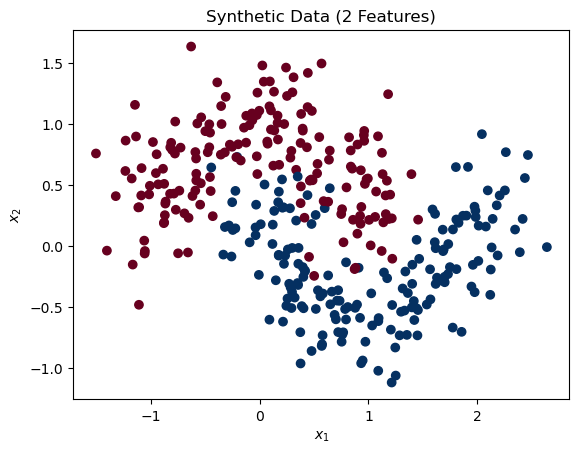

In [24]:
# Visualization of the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')  
plt.title("Synthetic Data (2 Features)")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### 5.4. Train the model

#### Comparison with LogisticRegression (from sklearn)

In [20]:
# Training the model using different versions of sckit-learn
# High-accuracy without L2 (term) 
model1 = LogisticRegression(penalty=None, max_iter=100000, tol=1.E-10).fit(X_train,y_train)
print(f"  LogisticRegression (sklearn) without L2 (Training Set) ::")
print(f"    coef:{model1.coef_}")
print(f"    intercept:{model1.intercept_}")
print(f"    score:{model1.score(X_train,y_train):8.4f}")

model2 = LogisticRegression(max_iter=100000, tol=1.E-10).fit(X_train,y_train)
print(f"  LogisticRegression (sklearn) (Training Set) ::")
print(f"    coef:{model2.coef_}")
print(f"    intercept:{model2.intercept_}")
print(f"    score:{model2.score(X_train,y_train):8.4f}")

  LogisticRegression (sklearn) without L2 (Training Set) ::
    coef:[[ 1.25117879 -4.27472833]]
    intercept:[0.40821305]
    score:  0.8429
  LogisticRegression (sklearn) (Training Set) ::
    coef:[[ 1.17659618 -3.52086773]]
    intercept:[0.25533315]
    score:  0.8486


### 5.5.Test the model

In [21]:
# Here comes your code to test the model
# i.e. calculate the accuracy

#### Comparison with LogisticRegression (from sklearn)

In [19]:
print(f"  LogisticRegression (sklearn) without L2 (Test Data Set) ::")
print(f"    score:{model1.score(X_test,y_test):8.4f}")
print(f"  LogisticRegression (sklearn) (Test Set) ::")
print(f"    score:{model2.score(X_test,y_test):8.4f}")

  LogisticRegression (sklearn) without L2 (Test Data Set) ::
    score:  0.8600
  LogisticRegression (sklearn) (Test Set) ::
    score:  0.8533


### 5.6.Final Visualization

In [35]:
# Here comes the code (including the separating plane)

## 6. Conclusion

Congratulations!<br>
* You have implemented the simplest neural net from scratch.
* You have learned that the training of a neural net is (in general) an iterative process 
  consisting of:
  + forward propagation
  + backward propagation
* Once the training has been done, you can test your neural net.
* You can apply your model on new data (from the same distribution)

This algorithm is the basic algorithm for **all** neural networks.


## 7.Perform the same task using PyTorch/Keras